# Poisson equation (vertical cases)
**21 September 2022 by MiniUFO**

---
[TOC]

---

## 1. Introduction
A streamfunction $\psi$ as well as vorticity $\zeta$ can also be defined in meridional ($y-z$) plane or zonal ($x-z$) plane.  In the meridional plane, $\psi$ is also named as **meridional overturning circulation**, and in the zonal plane,usually the equatorial plane, $\psi$ is also named as **Walker circulation**.

---
## 2. Example:

### 2.1 Meridional case
Here we first demonstrate the meridional case, in which meridional overturning streamfunction is inverted.  Note that we use `FiniteDiff` to compute the vorticity in the meridional section (i.e., $i$-component of vorticity vector).

In [21]:
import sys
sys.path.append('../../../')
import xarray as xr
import numpy as np
from xinvert import invert_Poisson, cal_flow, FiniteDiff

# load data
ds = xr.open_dataset('../../../Data/ZonalMean.nc')

v = ds.vm
w = ds.wm

# calculate vor in meridional plane
fd = FiniteDiff({'Z':'LEV', 'Y':'lat'}, BCs={'Z':'fixed','Y':'fixed'}, coords='lat-lon')
vor = fd.vort(v=v, w=w, components='i')

# invert streamfunction and flow
iParams = {
    'BCs'      : ['fixed', 'extend'],
    'undef'    : np.nan,
    'mxLoop'   : 5000,
    'tolerance': 1e-13,
}

sf = invert_Poisson(vor, dims=['LEV','lat'], coords='z-lat', iParams=iParams)
vs, ws = cal_flow(sf, dims=['LEV', 'lat'], coords='z-lat', BCs=iParams['BCs'])

{} loops 5000 and tolerance is 7.339510e-09


Plot the results:

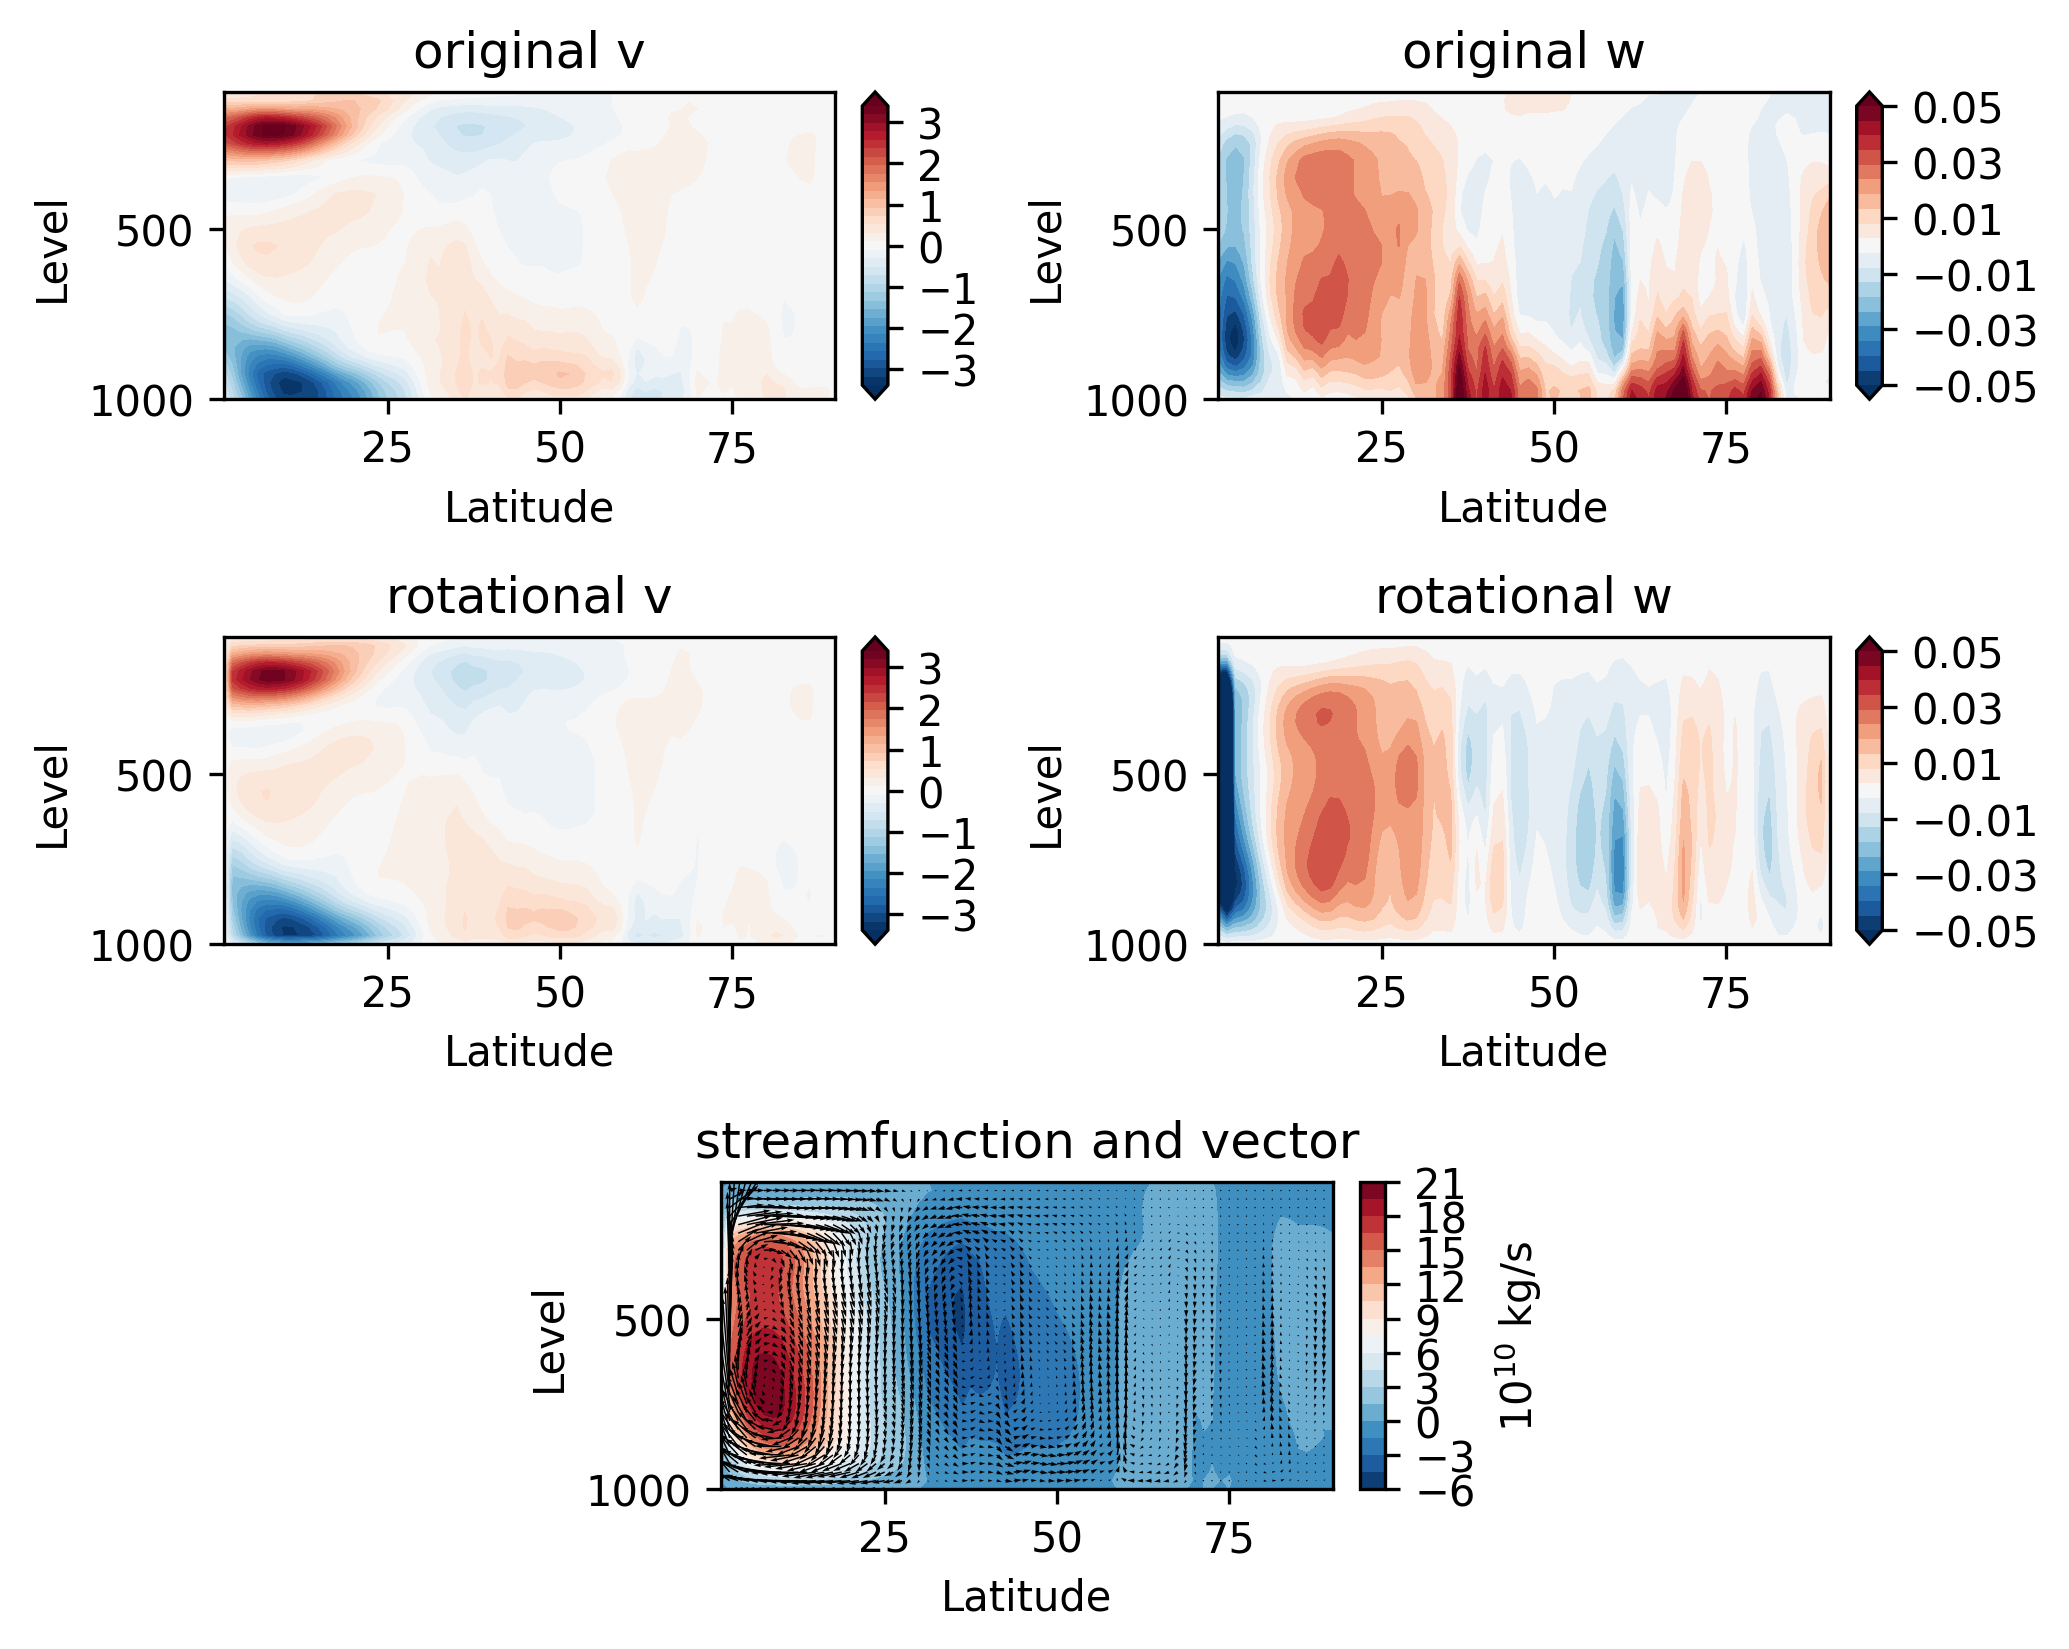

In [30]:
import matplotlib.pyplot as plt
import numpy as np

Re = 6371200
g = 9.80665
level = ds.LEV / 100
lat = ds.lat
const = 2 * np.pi * Re * np.cos(lat * np.pi / 180) / g

fig = plt.figure(figsize=(7, 5.6), dpi = 300)
gs = fig.add_gridspec(3, 4)

ax0 = fig.add_subplot(gs[0, 0:2])
m0 = ax0.contourf(lat, level, v, levels=np.linspace(-3.4, 3.4, 34), extend='both', cmap='RdBu_r')
cb0 = fig.colorbar(m0, ax=ax0, label='', ticks=np.arange(-3, 4, 1), fraction=0.05, pad=0.04, aspect=12)
ax0.set_title('original v')
ax0.set_xlabel('Latitude')
ax0.set_ylabel('Level')
ax0.invert_yaxis()

ax1 = fig.add_subplot(gs[0, 2:4])
m1 = ax1.contourf(lat, level, w, levels=np.linspace(-0.05, 0.05, 20), extend='both', cmap='RdBu_r')
cb1 = fig.colorbar(m1, ax=ax1, label='', ticks=np.arange(-0.05, 0.06, 0.02), fraction=0.05, pad=0.04, aspect=12)
ax1.set_title('original w')
ax1.set_xlabel('Latitude')
ax1.set_ylabel('Level')
ax1.invert_yaxis()

ax2 = fig.add_subplot(gs[1, 0:2])
m2 = ax2.contourf(lat, level, vs, levels=np.linspace(-3.4, 3.4, 34), extend='both', cmap='RdBu_r')
cb2 = fig.colorbar(m2, ax=ax2, label='', ticks=np.arange(-3, 4, 1), fraction=0.05, pad=0.04, aspect=12)
ax2.set_title('rotational v')
ax2.set_xlabel('Latitude')
ax2.set_ylabel('Level')
ax2.invert_yaxis()

ax3 = fig.add_subplot(gs[1, 2:4])
m3 = ax3.contourf(lat, level, ws, levels=np.linspace(-0.05, 0.05, 20), extend='both', cmap='RdBu_r')
cb3 = fig.colorbar(m3, ax=ax3, label='', ticks=np.arange(-0.05, 0.06, 0.02), fraction=0.05, pad=0.04, aspect=12)
ax3.set_title('rotational w')
ax3.set_xlabel('Latitude')
ax3.set_ylabel('Level')
ax3.invert_yaxis()

ax4 = fig.add_subplot(gs[2, 1:3])
m4 = ax4.contourf(lat, level, (sf * -const) / 1e10, levels=21, cmap='RdBu_r')
cb4 = fig.colorbar(m4, ax=ax4, label='$10^{10}$ kg/s', fraction=0.05, pad=0.04, aspect=12)
ax4.quiver(lat, level, vs, ws * -50, scale=50)
ax4.set_title('streamfunction and vector')
ax4.set_xlabel('Latitude')
ax4.set_ylabel('Level')
ax4.invert_yaxis()

plt.tight_layout()
plt.show()

It is clear to see a strong tropical branch of Hadley cell, a weak Ferrel cell, and a weakest polar cell.

### 2.2 Zonal case
Here we demonstrate the zonal case, in which Walker circulation streamfunction is inverted.  We also use `FiniteDiff` to compute the vorticity in the zonal section (i.e., $j$-component of vorticity vector).

In [31]:
import xarray as xr
import numpy as np
from xinvert import invert_Poisson, cal_flow, FiniteDiff


ds = xr.open_dataset('../../../Data/atmos3D.nc')
ds['LEV'] = ds['LEV'] * 100 # hPa to Pa

u = ds.U.sel(lat=slice(10, -10)).mean('lat')
w = ds.Omega.sel(lat=slice(10, -10)).mean('lat')

fd = FiniteDiff({'Z':'LEV', 'Y':'lat', 'X':'lon'}, BCs={'Z':'fixed', 'Y':'fixed', 'X':'periodic'}, coords='lat-lon')
vor = fd.vort(u=u, w=w, components='j')

iParams = {
    'BCs'      : ['fixed', 'periodic'],
    'undef'    : np.nan,
    'mxLoop'   : 5000,
    'tolerance': 1e-13,
}

sf = invert_Poisson(vor, dims=['LEV','lon'], coords='z-lon', iParams=iParams)
us, ws = cal_flow(sf, dims=['LEV','lon'], coords='z-lon', BCs=['fixed', 'periodic'])

{} loops 4597 and tolerance is 9.588766e-14


The result can be visualized as:

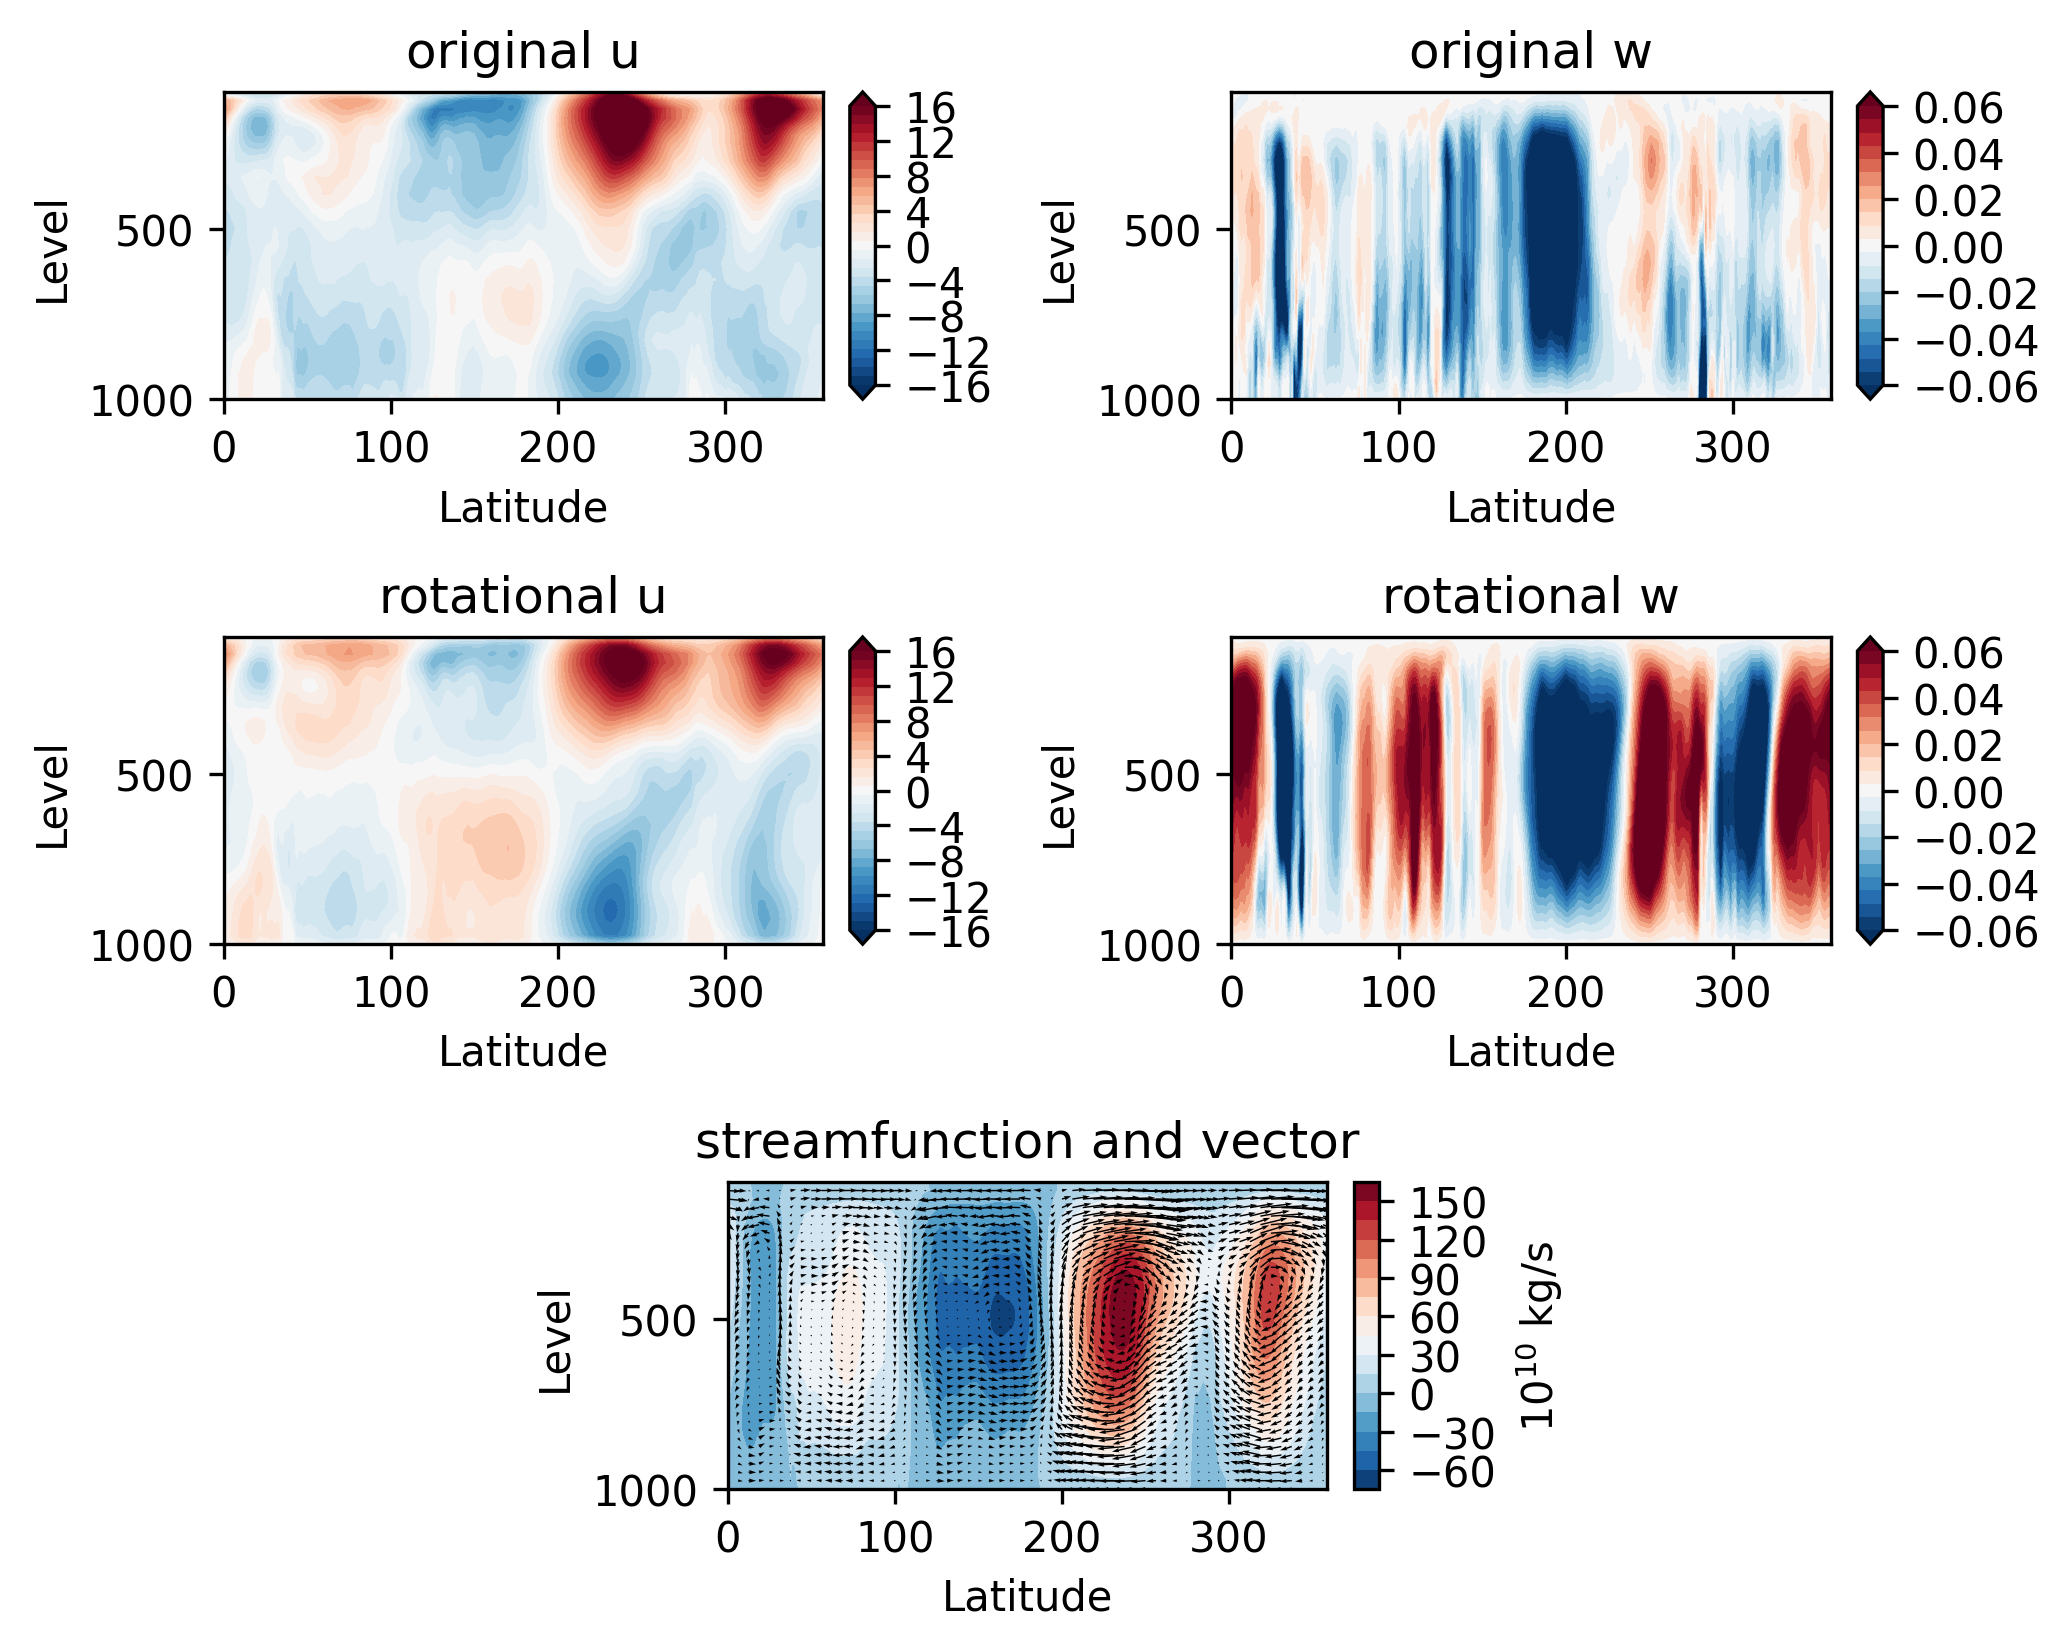

In [32]:
fig = plt.figure(figsize=(7, 5.6), dpi = 300)
gs = fig.add_gridspec(3, 4)

Re = 6371200
g = 9.80665
level = ds.LEV / 100
lon = ds.lon
const = 2 * np.pi * Re / g

ax0 = fig.add_subplot(gs[0, 0:2])
m0 = ax0.contourf(lon, level, u, levels=np.linspace(-16, 16, 32), extend='both', cmap='RdBu_r')
cb0 = fig.colorbar(m0, ax=ax0, label='', ticks=np.arange(-16, 17, 4), fraction=0.05, pad=0.04, aspect=12)
ax0.set_title('original u', fontsize=12)
ax0.set_xlabel('Latitude')
ax0.set_ylabel('Level')
ax0.invert_yaxis()

ax1 = fig.add_subplot(gs[0, 2:4])
m1 = ax1.contourf(lon, level, w, levels=np.linspace(-0.06, 0.06, 22), extend='both', cmap='RdBu_r')
cb1 = fig.colorbar(m1, ax=ax1, label='', ticks=np.arange(-0.06, 0.07, 0.02), fraction=0.05, pad=0.04, aspect=12)
ax1.set_title('original w', fontsize=12)
ax1.set_xlabel('Latitude')
ax1.set_ylabel('Level')
ax1.invert_yaxis()

ax2 = fig.add_subplot(gs[1, 0:2])
m2 = ax2.contourf(lon, level, us, levels=np.linspace(-16, 16, 32), extend='both', cmap='RdBu_r')
cb2 = fig.colorbar(m2, ax=ax2, label='', ticks=np.arange(-16, 17, 4), fraction=0.05, pad=0.04, aspect=12)
ax2.set_title('rotational u', fontsize=12)
ax2.set_xlabel('Latitude')
ax2.set_ylabel('Level')
ax2.invert_yaxis()

ax3 = fig.add_subplot(gs[1, 2:4])
m3 = ax3.contourf(lon, level, ws, levels=np.linspace(-0.06, 0.06, 22), extend='both', cmap='RdBu_r')
cb3 = fig.colorbar(m3, ax=ax3, label='', ticks=np.arange(-0.06, 0.07, 0.02), fraction=0.05, pad=0.04, aspect=12)
ax3.set_title('rotational w', fontsize=12)
ax3.set_xlabel('Latitude')
ax3.set_ylabel('Level')
ax3.invert_yaxis()

ax4 = fig.add_subplot(gs[2, 1:3])
m4 = ax4.contourf(lon, level, sf * const / 1e10, levels=21, cmap='RdBu_r')
cb4 = fig.colorbar(m4, ax=ax4, label='$10^{10}$ kg/s', fraction=0.05, pad=0.04, aspect=12)
ax4.quiver(lon[::5], level, us[:, ::5], ws[:, ::5] * -50, scale=250)
ax4.set_title('streamfunction and vector', fontsize=12)
ax4.set_ylabel('Level', fontsize=10)
ax4.set_xlabel('Latitude', fontsize=10)
ax4.invert_yaxis()

plt.tight_layout()
plt.show()

It is clear that there is a strong upward motion at central equatorial Pacific (near dateline).  Since the boundary condition is fixed, the inverted flow cannot penetrated through the four boundaries.

---

### References
